<img align="center" src="http://68.media.tumblr.com/92a71d62ace9940f8ddd540400444fc4/tumblr_inline_mppo32jFBC1qz4rgp.png"><p>
<h1><center>Capstone Project</center></h1><br><h1>Project: <em>Rio de Janeiro Business Segmentation by Neighborhood</em><h1>

### This project is part of the <em>'Applied Data Science Capstone Course'</em> from my Coursera Classes.

#### Developer: Diego Medeiros <br>GitHub: www.github.com/medeirox

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a><br>

2. <a href="#item2">Data</a><br>

3. <a href="#item3">Methodology</a><br>

4. <a href="#item4">Implementation</a>

</font>
</div>

<a id='item1'></a>

# 1. Business Problem

When starting a business, one needs to be as much confident as he can about the possibilites of success, and since a deep crisis in Brazil started, entreperneurs are having a hard time.<br>
Many people have lauched an entrepeneur carreer due to the difficult of finding a job, gathering as much money as they can from economies, family and friends with the hope of succeess as the only option.

This analysis focuses mainly on the stabilished businesses of each neighborhood, trying to model each place in a fashion to correlate to others and evidence possibilities of making profit from lacking areas. 

For the government, these observations can show possibilities for leveraging business benefits to grow certain areas.

An insight of the neighborhood lifestyle might become available as well, since the business needs say so much from a place and the stakeholder can even take other benefits beyond this report.

<strong>Target Audience:</strong><br>
Entrepeneurs seeking for an opportunity to invest resources.

<strong>Stakeholders:</strong>
    <ul>
    <li>Entrepeneurs</li>
    <li>Government of Rio de Janeiro</li>
    <li>Angel Investors</li>
    <li>Financing Groups</li>
    <li>Banks</li>
    </ul>



<a id='item2'></a>

## 2. Data

The following data is used to gather the target insights
<p>

<strong>1. List of Rio de Janeiro's neighborhoods</strong>
<br>
Source: <a href="https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro">Wikipedia list of Neighborhoods</a>
<br>
Inquiry date: 14/07/2019
<br>
Description: Wikipedia URL with the list and description of each neighborhood in Rio de Janeiro.
<br>
Type of resouce: Web page
<br>
Type of data: Html
<p>

<strong>2. Geolocation GeoPy, GeoCoder and LocationIQ API</strong>
<br>
Source 1: <a href="https://anaconda.org/conda-forge/geopy">GeoPy Library</a>
<br>
Source 2: <a href="https://anaconda.org/conda-forge/geocoder">Geocoder Library</a>
<br>
Source 3: <a href="https://locationiq.com/">LocationIQ</a>
<br>
Inquiry date: 14/07/2019
<br>
Description: GeoPy and Geocoder are both libraries for geoencoding of addresses. GeoPy will be used as the primary resource, and if data cannot be retreived from it, then Geocoder will be used associated with a LocationIQ free account assigned. Observe that, since LocationIQ has restrictions on the number of requests for the free account, it has been assinged as the backup resource.
<br>
Type of resource: Python Library
<br>
Type of Data: Source 1: Python Object | Source 2 and 3: JSON
<p>

<strong>3. Foursquare location information API</strong>
<br>
Source: <a href="https://foursquare.com">Foursquare</a>
<br>
Inquiry date: 14/07/2019
<br>
Description: Location business information API.
<br>
Type of resource: Restful API
<br>
Type of data: JSON
<br>



<a id='item3'></a>

## 3. Methodology

In a nutshell, the methodology to be used in this report is described below.

1. Data collected from the Wikipedia page has been processed to create a DataFrame of neighborhoods of Rio de Janeiro;
<p>
    
2. Gather the geolocation of each neighborhood and append to the initial dataframe;
<p>
    
3. Explore the data
<p>

4. Pre-process the data for the Machine Learning Algorithm
<p>
    
5. Run the model and plot the results

<a id='item4'></a>

## 4. Implementation

In [1]:
# Imports

import pandas as pd
import numpy as np
import requests
import copy

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
# External Dependencies Installation

#!conda install -c conda-forge geocoder --yes
#!conda install -c conda-forge folium=0.5.0 --yes

In [3]:
# External Dependencies Imports
import geocoder
from geopy.geocoders import Nominatim
import folium

In [4]:
# The code was removed by Watson Studio for sharing.

First, we'll gather data from Wikipedia regarding the name of all neighborhoods in Rio de Janeiro

In [5]:
raw_ = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro')
df_neigh = raw_[0]
df_neigh

,0,1,2,3
0,Bairros oficiais,Bairros oficiais,Bairros oficiais,Bairros oficiais
1,Zona,Subprefeitura(nº de bairros),Bairros[5],Imagens
2,Central,Centro Histórico e Zona Portuária (17)[6][7],Bairro Imperial de São Cristóvão • Benfica • C...,NaN
3,Sul,Zona Sul (17)[8],Botafogo • Catete • Copacabana • Cosme Velho •...,NaN
4,Oeste,Barra da Tijuca e Baixada de Jacarepaguá (19),Anil • Barra da Tijuca • Camorim • Cidade de D...,NaN
5,Oeste,Grande Bangu (10)[9],Bangu • Deodoro • Gericinó • Magalhães Bastos ...,NaN
6,Oeste,Zona Oeste (10),Barra de Guaratiba • Campo Grande • Cosmos • G...,NaN
7,Norte,Grande Tijuca (7),Alto da Boa Vista • Andaraí • Grajaú • Praça d...,NaN
8,Norte,Grande Méier (21)[10],Abolição • Água Santa • Cachambi • Del Castilh...,NaN
9,Norte,Ilha do Governador e Zona da Leopoldina (19),Bonsucesso • Bancários • Cacuia • Cidade Unive...,NaN


In [6]:
df_neigh.drop([0,1], inplace=True)
df_neigh.drop([1,3],axis=1, inplace=True)
df_neigh

,0,2
2,Central,Bairro Imperial de São Cristóvão • Benfica • C...
3,Sul,Botafogo • Catete • Copacabana • Cosme Velho •...
4,Oeste,Anil • Barra da Tijuca • Camorim • Cidade de D...
5,Oeste,Bangu • Deodoro • Gericinó • Magalhães Bastos ...
6,Oeste,Barra de Guaratiba • Campo Grande • Cosmos • G...
7,Norte,Alto da Boa Vista • Andaraí • Grajaú • Praça d...
8,Norte,Abolição • Água Santa • Cachambi • Del Castilh...
9,Norte,Bonsucesso • Bancários • Cacuia • Cidade Unive...
10,Norte,Acari • Anchieta • Barros Filho • Bento Ribeir...


In [7]:
df_neigh.columns = ['Zone', 'Neighborhood']
df_neigh.reset_index(inplace=True)
df_neigh.drop('index', axis=1, inplace=True)
df_neigh

,Zone,Neighborhood
0,Central,Bairro Imperial de São Cristóvão • Benfica • C...
1,Sul,Botafogo • Catete • Copacabana • Cosme Velho •...
2,Oeste,Anil • Barra da Tijuca • Camorim • Cidade de D...
3,Oeste,Bangu • Deodoro • Gericinó • Magalhães Bastos ...
4,Oeste,Barra de Guaratiba • Campo Grande • Cosmos • G...
5,Norte,Alto da Boa Vista • Andaraí • Grajaú • Praça d...
6,Norte,Abolição • Água Santa • Cachambi • Del Castilh...
7,Norte,Bonsucesso • Bancários • Cacuia • Cidade Unive...
8,Norte,Acari • Anchieta • Barros Filho • Bento Ribeir...


In [8]:
df_neigh['Neighborhood'] = df_neigh['Neighborhood'].transform(lambda x: x.split('•'))
df_neigh

,Zone,Neighborhood
0,Central,"[Bairro Imperial de São Cristóvão , Benfica ,..."
1,Sul,"[Botafogo , Catete , Copacabana , Cosme Vel..."
2,Oeste,"[Anil , Barra da Tijuca , Camorim , Cidade ..."
3,Oeste,"[Bangu , Deodoro , Gericinó , Magalhães Bas..."
4,Oeste,"[Barra de Guaratiba , Campo Grande , Cosmos ..."
5,Norte,"[Alto da Boa Vista , Andaraí , Grajaú , Pra..."
6,Norte,"[Abolição , Água Santa , Cachambi , Del Cas..."
7,Norte,"[Bonsucesso , Bancários , Cacuia , Cidade U..."
8,Norte,"[Acari , Anchieta , Barros Filho , Bento Ri..."


In [9]:
column_names = ['Zone', 'Neighborhood', 'Latitude', 'Longitude']
df_neigh1 = pd.DataFrame(columns=column_names)
#df_neigh1.columns = ['Zone', 'Neighborhood', 'Latitude', 'Longitude']
for z, neig_series in zip(df_neigh['Zone'], df_neigh['Neighborhood']):
    for n in neig_series:
        #print([z, n, 0.0, 0.0])
        df_neigh1 = df_neigh1.append(
            pd.DataFrame({'Zone':[z], 'Neighborhood':[n.strip()], \
                          'Latitude':[0.0], 'Longitude':[0.0]}, \
                          columns=column_names), ignore_index=True)
df_neigh1.head()

,Zone,Neighborhood,Latitude,Longitude
0,Central,Bairro Imperial de São Cristóvão,0.0,0.0
1,Central,Benfica,0.0,0.0
2,Central,Caju,0.0,0.0
3,Central,Catumbi,0.0,0.0
4,Central,Centro,0.0,0.0


In [10]:
df_neigh1.shape

(157, 4)

### Gathering of geoposition from the neighborhoods

In [13]:
'''
import time
from geopy.geocoders import Nominatim
import geocoder

enable_geocoder = True
enable_nominatim = False

address = 'Rio de Janeiro, RJ, Brasil'

if(enable_nominatim):
    geolocator = Nominatim(user_agent="rio_explorer")

df_latlon = pd.DataFrame(columns=column_names[2:])

for idx, neig in enumerate(df_neigh1['Neighborhood']):
    location = None
    while(location is None):
        if(enable_nominatim):
            location = geolocator.geocode('{}, {}'.format(neig, address))
        if(enable_geocoder):
            location = geocoder.locationiq('{}, {}'.format(neig, address), key=LOCATIONIQ_TOKEN)

        if(location is None):
            print('Error gathering data for {}, consulting contigency geocoder server'.format(neig))
            location = geocoder.locationiq('{}, {}'.format(neig, address), key=LOCATIONIQ_TOKEN)
            latitude = location.lat
            longitude = location.lng
        else:
            if(enable_nominatim):
                latitude = location.latitude
                longitude = location.longitude
            if(enable_geocoder):
                latitude = location.lat
                longitude = location.lng
        
        print('Neighborhood: {} | Lat: {} | Lon: {}'.format(neig, latitude, longitude))
        df_latlon = df_latlon.append(
            pd.DataFrame({'Latitude':[latitude], 'Longitude':[longitude]}, \
                  columns=column_names[2:]), ignore_index=True)
        if(enable_geocoder):
            # The free account has a limitation of 60 requests per minute
            time.sleep(1.1)

df_latlon
'''

'\nimport time\nfrom geopy.geocoders import Nominatim\nimport geocoder\n\nenable_geocoder = True\nenable_nominatim = False\n\naddress = \'Rio de Janeiro, RJ, Brasil\'\n\nif(enable_nominatim):\n    geolocator = Nominatim(user_agent="rio_explorer")\n\ndf_latlon = pd.DataFrame(columns=column_names[2:])\n\nfor idx, neig in enumerate(df_neigh1[\'Neighborhood\']):\n    location = None\n    while(location is None):\n        if(enable_nominatim):\n            location = geolocator.geocode(\'{}, {}\'.format(neig, address))\n        if(enable_geocoder):\n            location = geocoder.locationiq(\'{}, {}\'.format(neig, address), key=LOCATIONIQ_TOKEN)\n\n        if(location is None):\n            print(\'Error gathering data for {}, consulting contigency geocoder server\'.format(neig))\n            location = geocoder.locationiq(\'{}, {}\'.format(neig, address), key=LOCATIONIQ_TOKEN)\n            latitude = location.lat\n            longitude = location.lng\n        else:\n            if(enable_

In [14]:
df_latlon = pd.read_csv('rio_neighbourhood_latlon', encoding='utf-8')

In [15]:
# Let's keep this processed data into a file to speed up the process in future work.

#df_latlon.to_csv('rio_neighborhood_latlon', encoding='utf-8')

In [16]:
df_latlon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
Unnamed: 0      157 non-null int64
Unnamed: 0.1    157 non-null int64
Latitude        157 non-null float64
Longitude       157 non-null float64
dtypes: float64(2), int64(2)
memory usage: 5.0 KB


In [17]:
df_latlon.describe()

,Unnamed: 0,Unnamed: 0.1,Latitude,Longitude
count,157.000000,157.000000,157.000000,157.000000
mean,78.000000,78.000000,-22.871276,-43.278887
std,45.466105,45.466105,0.154158,0.275178
min,0.000000,0.000000,-23.047039,-43.694087
25%,39.000000,39.000000,-22.921399,-43.360837
50%,78.000000,78.000000,-22.888609,-43.293787
75%,117.000000,117.000000,-22.843507,-43.221935
max,156.000000,156.000000,-21.452964,-41.036737


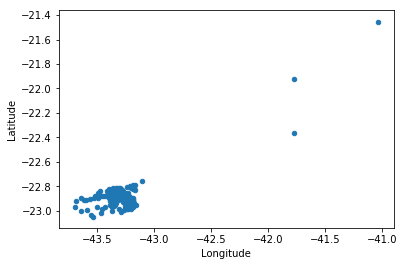

In [39]:
# Check coherence of data
df_latlon.plot(kind='scatter', y='Latitude', x='Longitude')

In [19]:
df_neigh2 = df_neigh1
df_neigh2['Latitude'] = df_latlon['Latitude']
df_neigh2['Longitude'] = df_latlon['Longitude']
df_neigh2.head()

,Zone,Neighborhood,Latitude,Longitude
0,Central,Bairro Imperial de São Cristóvão,-22.899318,-43.221935
1,Central,Benfica,-22.892297,-43.240341
2,Central,Caju,-22.880306,-43.221494
3,Central,Catumbi,-22.919662,-43.199064
4,Central,Centro,-22.904393,-43.183065


In [20]:
df_neigh2[(df_latlon['Longitude']>-43) | (df_latlon['Longitude'] < -45)]

,Zone,Neighborhood,Latitude,Longitude
22,Sul,Glória (bairro do Rio de Janeiro),-22.367493,-41.769976
88,Norte,Manguinhos,-21.452964,-41.036737
91,Norte,Piedade,-21.926150,-41.769976


The 3 data above are giving spots out of Rio de Janeiro. To have a fast resolution of the problem, I'll take this data manually from google maps and will feed the DataSet.

From Google Maps we get:
Glória: -22.921433, -43.172496
Manguinhos: -22.878704, -43.245644
Piedade: -22.890336, -43.309663

Since Glória is the only neighborhood with unnecessary data in the description, we'll clean it as well

In [21]:
# Neighborhood geolocation correction
df_neigh2.loc[22, 'Latitude']=-22.921433; df_neigh2.loc[22, 'Longitude']=-43.172496
df_neigh2.loc[88, 'Latitude']=-22.878704; df_neigh2.loc[88, 'Longitude']=-43.245644
df_neigh2.loc[91, 'Latitude']=-22.890336; df_neigh2.loc[91, 'Longitude']=-43.309663

# Neighborhood name correction
df_neigh2.loc[0, 'Neighborhood'] = 'São Cristóvão'
df_neigh2.loc[22, 'Neighborhood'] = 'Glória'

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_neigh2)

        Zone              Neighborhood   Latitude  Longitude
0    Central             São Cristóvão -22.899318 -43.221935
1    Central                   Benfica -22.892297 -43.240341
2    Central                      Caju -22.880306 -43.221494
3    Central                   Catumbi -22.919662 -43.199064
4    Central                    Centro -22.904393 -43.183065
5    Central               Cidade Nova -22.910051 -43.201756
6    Central                   Estácio -22.916627 -43.203630
7    Central                    Gamboa -22.897749 -43.192904
8    Central                      Lapa -22.913026 -43.182236
9    Central                 Mangueira -22.904153 -43.236497
10   Central                   Paquetá -22.758926 -43.109199
11   Central              Rio Comprido -22.927945 -43.208857
12   Central              Santa Teresa -22.921399 -43.188214
13   Central              Santo Cristo -22.900766 -43.203393
14   Central                     Saúde -22.897184 -43.184154
15   Central            

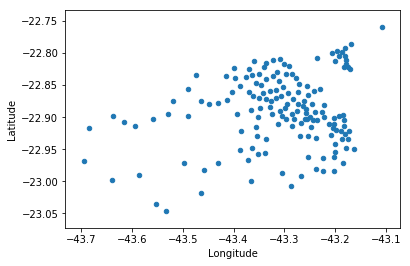

In [22]:
# Check again coherence of data
df_neigh2.plot(kind='scatter', y='Latitude', x='Longitude')

Seems so much better since now Paquetá (-22.758926 -43.109199) is the outlier, what makes sense, because this Neighborhood is actually an Island.

Now let's plot the map with Rio's neighborhoods to make sure everything is in place

In [23]:
latitude = -22.918873
longitude = -43.436411

rio_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_neigh2.Latitude, df_neigh2.Longitude, df_neigh2.Neighborhood):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='red',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rio_map)

rio_map

The next step is to gather FourSquare's list of venues for each place.

In [24]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
RADIUS = 2000

#df_venues = getNearbyVenues(df_neigh2['Neighborhood'], df_neigh2['Latitude'], df_neigh2['Longitude'], radius=RADIUS)
#df_venues.head()

Let's check what are the most common kind of venues in Rio de Janeiro

In [26]:
df_venues = pd.read_csv(r'rio_venues')

In [27]:
#df_venues.to_csv('rio_venues', encoding='utf-8')

In [28]:
df_venues.groupby('Venue Category').count().sort_values(by=['Venue'], ascending=False)

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,
Bar,741,741,741,741,741,741,741
Brazilian Restaurant,673,673,673,673,673,673,673
Gym / Fitness Center,476,476,476,476,476,476,476
Pizza Place,475,475,475,475,475,475,475
Gym,425,425,425,425,425,425,425
Bakery,415,415,415,415,415,415,415
Plaza,329,329,329,329,329,329,329
Restaurant,302,302,302,302,302,302,302
Fast Food Restaurant,297,297,297,297,297,297,297


### Seems like Cariocas' (people born in Rio) favorite things to do are <em>Drinking, Eating and Working out!</em>

In [29]:
df_venues.groupby(['Neighborhood', 'Venue Category']).count()

Unnamed: 0  Neighborhood Latitude  \
Neighborhood Venue Category                                                 
Abolição     Art Museum                          1                      1   
             Auto Dealership                     1                      1   
             BBQ Joint                           5                      5   
             Bakery                              2                      2   
             Bar                                 8                      8   
             Beer Garden                         1                      1   
             Bookstore                           2                      2   
             Bowling Alley                       1                      1   
             Brazilian Restaurant                4                      4   
             Burger Joint                        1                      1   
             Bus Station                         1                      1   
             Candy Store                         1                      1   
             Chocolate Shop                      3                      3   
             Clothing Store                      1                      1   
             Coffee Shop                         2                      2   
             Deli / Bodega                       1                      1   
             Farmers Market                      1                      1   
             Fast Food Restaurant                3                      3   
             Food & Drink Shop                   1                      1   
             Food Truck                          5                      5   
             Frame Store                         1                      1   
             Fried Chicken Joint                 1                      1   
             Gym                                 3                      3   
             Gym / Fitness Center                5                      5   
             History Museum                      1                      1   
             Hot Dog Joint                       1                      1   
             Ice Cream Shop                      3                      3   
             Market                              1                      1   
             Middle Eastern Restaurant           1                      1   
             Pastelaria                          1                      1   
...                                            ...                    ...   
Zumbi        Sports Club                         1                      1   
             Steakhouse                          1                      1   
             Supermarket                         1                      1   
             Sushi Restaurant                    1                      1   
Água Santa   Acai House                          1                      1   
             Art Museum                          1                      1   
             Arts & Entertainment                1                      1   
             BBQ Joint                           1                      1   
             Bakery                              2                      2   
             Bar                                 4                      4   
             Brazilian Restaurant                1                      1   
             Clothing Store                      1                      1   
             Farmers Market                      1                      1   
             Food Truck                          1                      1   
             Fried Chicken Joint                 1                      1   
             Fruit & Vegetable Store             1                      1   
             Grocery Store                       1                      1   
             Gym                                 3                      3   
             Gym / Fitness Center                2                      2   
             Japanese Restaurant    

In [30]:
print('There are {} venues.'.format(df_venues.shape[0]))

There are 12497 venues.


In [31]:
print('There are {} unique categories of venues.'.format(len(df_venues['Venue Category'].unique())))

There are 353 unique categories of venues.


It's time starting processing the venues data for the Machine Learning algorithm

In [32]:
# one hot encoding
rio_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rio_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rio_onehot.columns[-1]] + list(rio_onehot.columns[:-1])
rio_onehot = rio_onehot[fixed_columns]

rio_onehot.head()

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Veterinarian,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
rio_grouped = rio_onehot.groupby('Neighborhood').mean().reset_index()
rio_grouped

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Veterinarian,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abolição,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Acari,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.016393,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alto da Boa Vista,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0625,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Anchieta,0.000,0.012658,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Andaraí,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.01000,0.000000,0.000000,0.0000,0.00,0.010000,0.010000,0.000000,0.000000,0.010000
5,Anil,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Bancários,0.000,0.000000,0.00,0.00,0.000000,0.0,0.016949,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bangu,0.000,0.020000,0.01,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000
8,Barra da Tijuca,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.01,0.010000,0.000000,0.000000,0.000000,0.000000
9,Barra de Guaratiba,0.000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


Checking the number of Neighborhoods after regrouping

In [34]:
rio_grouped.shape

(157, 354)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rio_grouped['Neighborhood']

for ind in np.arange(rio_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abolição,Bar,Pizza Place,BBQ Joint,Gym / Fitness Center,Food Truck,Brazilian Restaurant,Chocolate Shop,Sandwich Place,Fast Food Restaurant,Plaza
1,Acari,Restaurant,Snack Place,Gym / Fitness Center,Supermarket,Bakery,Motel,Pizza Place,Convenience Store,Pet Store,Clothing Store
2,Alto da Boa Vista,Scenic Lookout,Garden,Sandwich Place,Gym,Sculpture Garden,Auto Dealership,Athletics & Sports,Outdoors & Recreation,Pharmacy,Speakeasy
3,Anchieta,Plaza,Fast Food Restaurant,Bar,Burger Joint,Gym / Fitness Center,Bakery,Snack Place,Supermarket,Restaurant,Music Venue
4,Andaraí,Bar,Gym,Bakery,Pizza Place,Gym / Fitness Center,Chocolate Shop,Music Venue,Ice Cream Shop,Pet Store,Food Truck


In [37]:
# set number of clusters
kclusters = 10

rio_grouped_clustering = rio_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rio_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 5, 4, 0, 0, 7, 0, 1, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rio_merged = df_neigh2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rio_merged = rio_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

rio_merged.head() # check the last columns!

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,São Cristóvão,-22.899318,-43.221935,6,Bar,Brazilian Restaurant,Portuguese Restaurant,Soccer Stadium,Wine Bar,Italian Restaurant,Samba School,BBQ Joint,Dive Bar,Snack Place
1,Central,Benfica,-22.892297,-43.240341,2,Brazilian Restaurant,Portuguese Restaurant,Restaurant,Soccer Stadium,Wine Bar,Sandwich Place,Athletics & Sports,Burger Joint,Snack Place,Lighting Store
2,Central,Caju,-22.880306,-43.221494,2,Brazilian Restaurant,Northeastern Brazilian Restaurant,Restaurant,Portuguese Restaurant,Bakery,Karaoke Bar,Burger Joint,Snack Place,Soccer Stadium,Boat or Ferry
3,Central,Catumbi,-22.919662,-43.199064,6,Brazilian Restaurant,Bar,Hotel,Italian Restaurant,Plaza,Dive Bar,Coffee Shop,Cocktail Bar,Café,Pizza Place
4,Central,Centro,-22.904393,-43.183065,6,Music Venue,Coffee Shop,Bookstore,Brazilian Restaurant,Salad Place,Burger Joint,Church,Chocolate Shop,Cultural Center,Tram Station


In [41]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rio_merged = df_neigh2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rio_merged = rio_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

rio_merged.head() # check the last columns!

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,São Cristóvão,-22.899318,-43.221935,6,Bar,Brazilian Restaurant,Portuguese Restaurant,Soccer Stadium,Wine Bar,Italian Restaurant,Samba School,BBQ Joint,Dive Bar,Snack Place
1,Central,Benfica,-22.892297,-43.240341,2,Brazilian Restaurant,Portuguese Restaurant,Restaurant,Soccer Stadium,Wine Bar,Sandwich Place,Athletics & Sports,Burger Joint,Snack Place,Lighting Store
2,Central,Caju,-22.880306,-43.221494,2,Brazilian Restaurant,Northeastern Brazilian Restaurant,Restaurant,Portuguese Restaurant,Bakery,Karaoke Bar,Burger Joint,Snack Place,Soccer Stadium,Boat or Ferry
3,Central,Catumbi,-22.919662,-43.199064,6,Brazilian Restaurant,Bar,Hotel,Italian Restaurant,Plaza,Dive Bar,Coffee Shop,Cocktail Bar,Café,Pizza Place
4,Central,Centro,-22.904393,-43.183065,6,Music Venue,Coffee Shop,Bookstore,Brazilian Restaurant,Salad Place,Burger Joint,Church,Chocolate Shop,Cultural Center,Tram Station


In [42]:
rio_merged['Cluster Labels'].max()

9

In [189]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rio_merged['Latitude'], rio_merged['Longitude'], rio_merged['Neighborhood'], rio_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' | Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Inspecting the distribution of clusters one can identify that near by neighborhoods tend to be similar, and the segmentation by population density, cultural diversity and wealth distribution of the city becomes more evident.

In [49]:
a = rio_merged[rio_merged['Cluster Labels']==0]
a.head()

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Central,Mangueira,-22.904153,-43.236497,0,Bar,Portuguese Restaurant,Soccer Stadium,Gym,Gym / Fitness Center,Bakery,Japanese Restaurant,Wine Bar,Gourmet Shop,Seafood Restaurant
31,Oeste,Anil,-22.955813,-43.338412,0,Bar,Brazilian Restaurant,Pizza Place,Italian Restaurant,Bakery,Gym,Gym / Fitness Center,Burger Joint,Sandwich Place,Steakhouse
36,Oeste,Freguesia de Jacarepaguá,-22.933947,-43.336492,0,Bar,Pizza Place,Brazilian Restaurant,Bakery,Gym / Fitness Center,Gym,Italian Restaurant,Martial Arts Dojo,Burger Joint,Japanese Restaurant
37,Oeste,Gardênia Azul,-22.958287,-43.351224,0,Bar,Brazilian Restaurant,Gym,Fast Food Restaurant,Sandwich Place,Café,Bakery,Pizza Place,Seafood Restaurant,Burger Joint
42,Oeste,Praça Seca,-22.899262,-43.352779,0,Gym,Bar,Pizza Place,Burger Joint,Restaurant,Gym / Fitness Center,Supermarket,Nightclub,Sandwich Place,Bakery


In [67]:
cluster_total = rio_onehot.groupby('Neighborhood').sum().head()
cluster_total.reset_index(inplace=True)
cluster_total.head()

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Veterinarian,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abolição,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acari,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Alto da Boa Vista,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Anchieta,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andaraí,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [ ]:
cluster_total['Cluster'] = [cluster for rio_merged['Neighborhood']==cluster_total['Neighborhood']]

In [102]:
cols = [c for c in rio_merged.iloc[:, 5:]]

In [173]:
top_k = 10

clusters_counts = []

for cluster_n in range(0,kclusters):
    a=[]
    for i in range(5,15):
        a=a+[c for c in rio_merged[rio_merged['Cluster Labels']==cluster_n].iloc[:,i]]
    clusters_counts.append(pd.Series(a).value_counts())


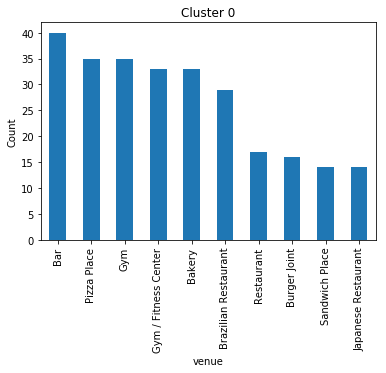

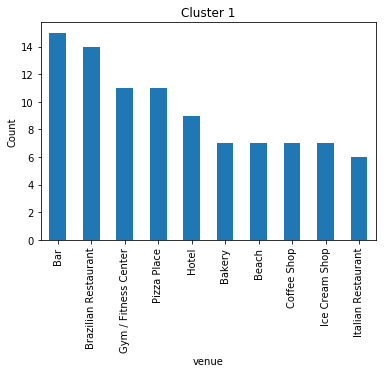

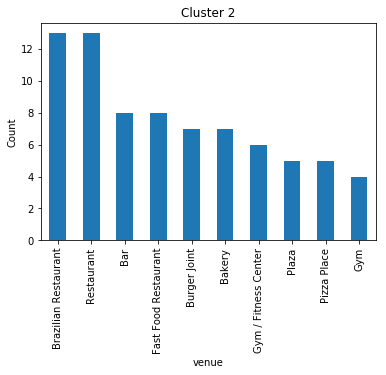

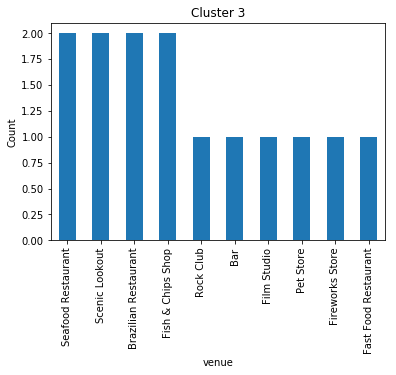

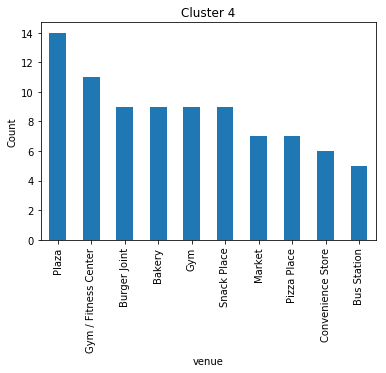

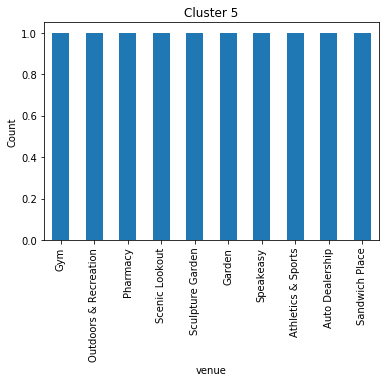

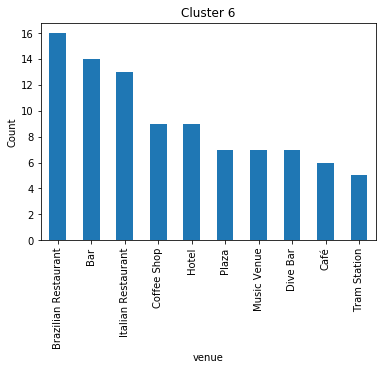

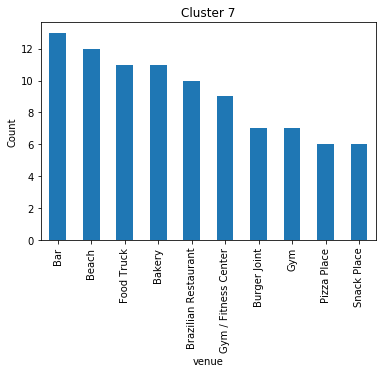

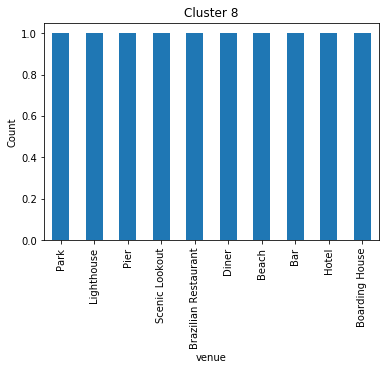

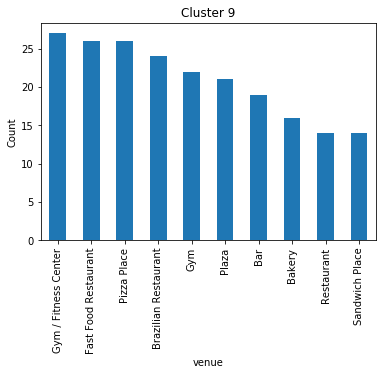

In [188]:
for j in range(0, kclusters):
    d = pd.DataFrame(clusters_counts[j][:10]).reset_index()
    d.columns = ['venue', 'count']
    ax = d.plot(kind='bar', x='venue', y='count', title='Cluster {}'.format(j), legend=False)
    ax.set_ylabel("Count")

<h3>
From the data above, we can see that there are clusters of neighborhoods with plenty of venues, while others have only a few.
<p>
<p>
The clusters with most venues are:
0, 1, 2, 4, 6, 7 and 9.
</h3>


### Inspecting the number of venues by cluster, it's possible to inference the population density in each one.

Text(0, 0.5, 'Count')

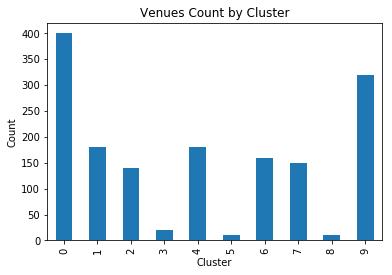

In [187]:
venues_total = pd.DataFrame([c.sum() for c in clusters_counts[:][:10]]).reset_index()
venues_total.columns = ['Cluster', 'Count']
ax = venues_total.plot(kind='bar', x='Cluster', y='Count', title='Venues Count by Cluster', legend=False)
ax.set_ylabel("Count")